# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python
!pip install --upgrade tqdm

Requirement already up-to-date: tqdm in c:\users\furkan\miniconda3\envs\drlnd\lib\site-packages (4.44.1)


In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(base_port=5002, file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Implementation of the DQN

First of all, an agent was designed to interact with the environment. The agent employs a Deep Q Network to figure out the correlations and non-linear relations. In this submission, only DQN will be implemented. 

**PS: Please note that TQDM bars may or may not be present in the PDF. They will show the progress of the number of episodes and obtained scores.**

Chosen parameters were actually should be a good starting point for nearly all RL projects like this one. They can be fine-tuned for every project, however, in this project they were sufficient. Let's take a look at the chosen hyper-parameters:

- Chosen network: Chosen network is a 3-layered fully connected layer with the layer sizes of [27, 32, 64, 4]. The complexity of the network was sufficient enough to learn non-linear relations between the states and actions.
- Chosen algorithm: Chosen algorithm was DQN as it was the easiest to implement and gives a good idea if chosen hyper-parameters are good enough to learn from the environment.
- Buffer size: 10^5, Size of the replay buffer. Can be enlarged. Enlarging it may cause performance problems.
- Batch size: Sampled batch's size from the buffer. One may benefit more stable  gradients and (computationally) faster learning procedure.
- Gamma: Discount factor for the future benefits. Gamma close to 1 will make the agent win in the long run, as it promotes the future rewards. Should be adjusted carefully for the current problem.
- Tau: Coefficient for the network update. Too large Tau may introduce unstabilized learning experience.
- Learning rate: Learning rate of the model.
- Update every: How long the wait should be to soft update the network.

In the cell below, a new agent was created. Please take a look at *agent.py* file for further information about implementation.

In [8]:
from agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In the cell below, a DQN training sequence is being held. Please take a look at *dqn_utils.py* and the documentation of the *train_dqn* function for further information about implementation.

In [9]:
from dqn_utils import train_dqn
scores = train_dqn(env, agent)


Environment solved in 390 episodes!	Average Score: 13.04


Obtained scores are quite noisy to observe mean scores over time (episodes). In the cell below, a lambda function is defined to obtain moving average of the scores

In [36]:
moving_average = lambda data, window_width=100 : np.convolve(data, np.ones(window_width)/window_width, mode="valid")

As it can be seen below, the average score goes up as the episodes pass on.

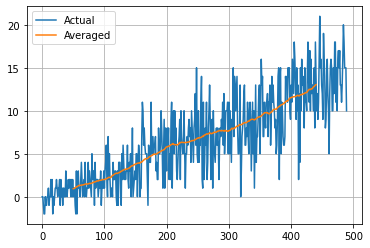

In [43]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(np.arange(50, len(scores)-49), moving_average(scores))
plt.legend(["Actual", "Averaged"])
plt.grid()

### Some comments and further improvements
This work investigates if an agent powered by a dqn could solve the environment. DQN was sufficient enough for solving this easy task within a short period with consistently-increasing results. However, this learning process could be faster and more robust. For instance:
- Double DQN may introduce a faster and more robust training procedure by taking advantage of TD-Error idea.
- Prioritised experience replay may introduce a faster training procedure. This procedure is not suppose to be more robust. However, generally, it is expected to have a better learning curve and converge to a better reward.

The inputs of the states are designed for this kind of project. This may not be a class project, but a real life problem to solve. Unity agent provides 84x84 image inputs, and that's how we learn things in real life. A CNN architecture may be provided within the agent model to capture spatial features. Hence, the agent might learn from what it see instead of some hand-crafted features for this particular project.

**Another idea for solving the environment from pixels: Environments' appearence are quite simple, there are yellow and blue bananas, gray walls, ground and sky. Bananas are easily distinguishable from background elements, and from different type of bananas. A naive segmentation algorithm can be implemented with computer vision techniques.**